# Konwolucyjne sieci neuronowe

Dziś spróbujemy stworzyć i wytrenować prostą sieć konwolucyjną do rozpoznawania, co znajduje się na obrazie. Następnie omówimy kwestię identyfikowania obiektów na obrazie, oraz porozmawiamy o wykorzystaniu gotowej już sieci.

## Problem klasyfikacji obrazów

Jak się za to zabrać? Naiwnym podejściem byłaby próba ręcznej specyfikacji pewnych cech (niemowlęta mają duże głowy, szczoteczki są długie, etc.). Szybko jednak stwierdziliśmy, że nawet dla niewielkiego zbioru kategorii jest to tytaniczna praca bez gwarancji sukcesu. Co więcej, istnieje wiele czynników zniekształcających zawartość naszych zdjęć. Obiekty mogą być przedstawiane z różnych ujęć, w różnych warunkach oświetleniowych, w różnej skali, częściowo niewidoczne, ukryte w tle...

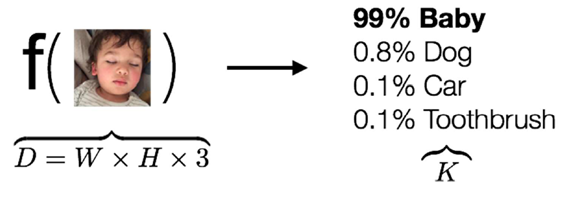


Wszystkie wymienione problemy są skutkiem istnienia semantycznej przepaści między tym, jak reprezentowane są nasze dane wejściowe (tablica liczb), a tym, czego w nich szukamy, czyli kategorii i cech: zwierząt, nosów, głów, itp. Zamiast więc próbować samodzielnie napisać funkcję $f(x)$, spróbujemy skorzystać z dobrodziejstw uczenia maszynowego, aby automatycznie skonstruować reprezentację wejścia właściwą dla postawionego sobie zadania (a przynajmniej lepszą od pierwotnej). I tu z pomocą przychodzą nam konwolucyjne sieci neuronowe. Do tego trzeba zrozumieć, czym jest konwolucja (inaczej: splot), a do tego najlepiej nadają się ilustracje, jak to działa.

### Konwolucja

Konwolucja (splot) to działanie określone dla dwóch funkcji, dające w wyniku inną, która może być postrzegana jako zmodyfikowana wersja oryginalnych funkcji.

Z naszego punktu widzenia polega to na tym, że mnożymy odpowiadające sobie elementy z dwóch macierzy: obrazu, oraz mniejszej, nazywanej filtrem (lub kernelem. Następnie sumujemy wynik i zapisujemy do macierzy wynikowej na odpowiedniej pozycji. Proces powtarza się aż do momentu przeskanowania całego obrazu. Taki filtr wykrywa, czy coś do niego pasuje w danym miejscu, i z tego wynika zdolność semantycznej generalizacji sieci - uczymy się cech, a wykrywamy je potem w dowolnym miejscu. [Przydatne pojęcia](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)

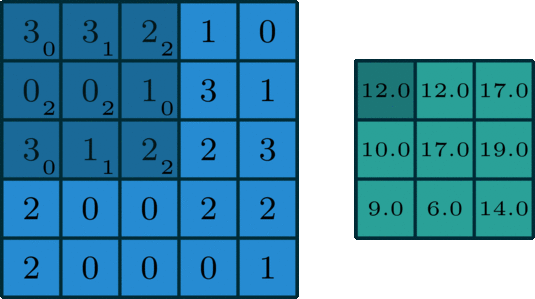

### Stride

Stride to inaczej *krok algorytmu*, albo *przesunięcie*. Określa co ile komórek macierzy następuje aplikacja operatora konwolucji. Jeśli stride wynosi 1 a operator konwolucji ma rozmiar np. 3 x 3, to każdy piksel (z wyjątkiem skrajnych narożnych pikseli) będzie uczestniczył w wielu operacjach konwolucji. Jeśli natomiast krok wyniósłby 3, to każdy piksel uczestniczyłby tylko jednokrotnie w tych operacjach. Należy pamiętać, że krok stosujemy zarówno w poziomie, jak i pionie. Najczęściej w obu kierunkach wykorzystuje się ten sam krok.


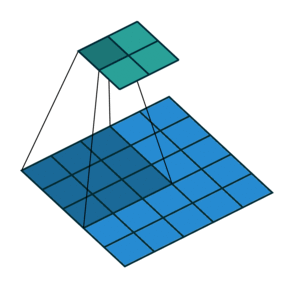



### Padding

Padding to inaczej *wypełnienie* krawędzi obrazu. Określa, w jaki sposób będą traktowane skrajne piksele. Jeśli padding wynosi 0, to skrajne piksele będą uczestniczyły w operacjach konwolucji rzadziej, niż pozostałe piksele (oczywiście jest to również uzależnione od wartości kroku). Aby zniwelować ten efekt, możemy dodać wypełnienie wokół całego obrazu. Te dodatkowe piksele mogą być zerami, albo mogą być również jakimiś uśrednionymi wartościami pikseli sąsiednich. Wypełnienie zerami oznacza de facto obramowanie całego obrazu czarną ramkną. 

[Więcej na temat wypełnienia.](https://www.geeksforgeeks.org/cnn-introduction-to-padding/)

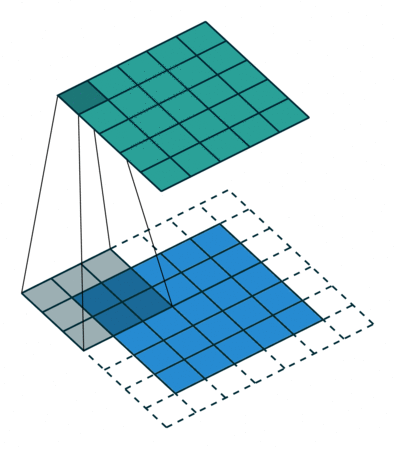

### Pooling

Pooling jest procesem wykorzystywanym do redukcji rozmiaru obrazu. 
Występują 2 warianty: *max-pooling* oraz *avg-pooling*. Pozwala on usunąć zbędne dane, np. jeżeli filtr wykrywa linie, to istnieje spora szansa, że linie te ciągną się przez sąsiednie piksele, więc nie ma powodu powielać tej informacji. Dzięki temu wprowadzamy pewną inwariancję w wagach sieci i jesteśmy odporni na niewielkie wahania lokalizacji informacji, a skupiamy się na "większym obrazie".

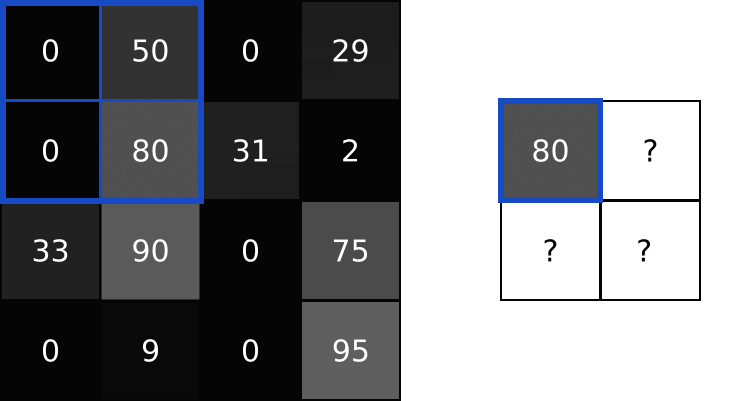

### Sposoby redukcji przeuczenia

* warstwa dropout - wyłączanie losowych neuronów w trakcie uczenia,
* regularyzacja wag - ograniczenie sumy wartości wag,
* metoda wczesnego stopu (early stopping) - zatrzymanie uczenia, jeśli proces uczenia nie poprawia wyników,
* normalizacja paczki (batch normalization) - centrowanie i skalowanie wartości wektorów *w obrębie batcha danych*, 
* rozszerzanie danych (data augmentation) - generowanie lekko zaburzonych danych, na podstawie danych treningowych,
* lub... więcej danych.

### Budowa sieci CNN do klasyfikacji obrazów

Sieć konwolucyjna składa się zawsze najpierw, zgodnie z nazwą, z części konwolucyjnej, której zadaniem jest wyodrębnienie przydatnych cech z obrazu za pomocą filtrów, warstw poolingowych etc.

Warstwa konwolucyjna sieci neuronowej składa się z wielu filtrów konwolucyjnych działających równolegle (tj. wykrywających różne cechy). Wagi kerneli, początkowo zainicjalizowane losowo, są dostrajane w procesie uczenia. Wynik działania poszczególnych filtrów jest przepuszczany przez funkcję nieliniową. Mamy tu do czynienia z sytuacją analogiczną jak w MLP: najpierw wykonujemy przekształcenie liniowe, a potem stosujemy funkcję aktywacji. Funkcji aktywacji nie stosuje się jendak po warstawch poolingowych, są to stałe operacje nie podlegające uczeniu.

W celu klasyfikacji obrazu musimy później użyć sieci MLP. Jako że wejściem do sieci MLP jest zawsze wektor, a wyjściem warstwy konwolucyjnej obraz. Musimy zatem obraz przetworzony przez filtry konwolucyjne sprowadzić do formy wektora, tzw. **embedding-u / osadzenia**, czyli reprezentacji obrazu jako punktu w pewnej ciągłej przestrzeni. Służy do tego warstwa spłaszczająca (flatten layer), rozwijająca macierze wielkowymiarowe na wektor, np $10 \times 10 \times 3$ na $300 \times 1$.

Część konwolucyjna nazywa się często **backbone**, a część MLP do klasyfikacji **head**. Głowa ma zwykle 1-2 warstwy w pełni połączone, z aktywacją softmax w ostatniej warstwie. Czasem jest nawet po prostu pojedynczą warstwą z softmaxem, bo w dużych sieciach konwolucyjnych ekstrakcja cech jest tak dobra, że taka prosta konstrukcja wystacza do klasyfikacji embeddingu.

In [218]:
import torch
import torchvision
import torchvision.transforms as transforms

Wybierzmy rodzaj akceleracji. Współczesne wersje PyTorch wspierają akcelerację nie tylko na kartach Nvidii i AMD, ale również na procesorach Apple z serii M. Obsługa AMD jest realizowana identycznie jak CUDA natomiast MPS (Apple) ma nieco inne API do sprawdzania dostępności i wybierania urządzenia. 
Zapisujemy wybrane urządzenie do zmiennej `device`, dzięki czemu w dalszych częściach kodu już nie będziemy musieli o tym myśleć.

In [219]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
elif torch.backends.mps.is_available():
    device = torch.device("mps")

print(device)

cuda:0


W pakiecie torchvision mamy funkcje automatycznie pobierające niektóre najbardziej popularne zbiory danych z obrazami. 

W tym ćwiczeniu wykorzystamy zbiór FashionMNIST, który zawiera małe (28x28) zdjęcia ubrań w skali szarości. Zbiór ten został stworzony przez Zalando i jest "modowym" odpowiednikiem "cyferkowego" MNIST-a, jest z nim kompatybilny pod względem rozmiarów i charakterystyki danych, ale jest od MNIST-a trudniejszy w klasyfikacji.

Do funkcji ładujących zbiory danych możemy przekazać przekształcenie, które powinno zostać na nim wykonane. Przekształcenia można łączyć przy użyciu `transforms.Compose`. W tym przypadku przekonwertujemy dane z domyślnej reprezentacji PIL.Image na torch-owe tensory.

Pobrany dataset przekazujemy pod kontrolę DataLoader-a, który zajmuje się podawaniem danych w batch-ach podczas treningu.

In [284]:
transform = transforms.Compose([transforms.ToTensor()])

batch_size = 32

trainset = torchvision.datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=transform
)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.FashionMNIST(
    root="./data", train=False, download=True, transform=transform
)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

classes = (
    "Top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
)

print(type(testset[0][0]))

<class 'torch.Tensor'>


Zobaczmy, co jest w naszym zbiorze danych. Poniżej kawałek kodu, który wyświetli nam kilka przykładowych obrazków. Wartości pikseli są znormalizowane do przedziału [0,1].

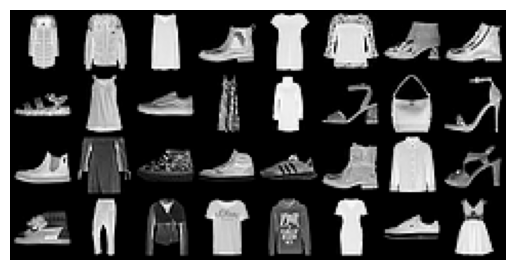

Coat       Coat       Shirt      Ankle boot Top        Shirt      Ankle boot Ankle boot
Sandal     Top        Sneaker    Dress      Coat       Sandal     Bag        Sandal    
Ankle boot Shirt      Sneaker    Sneaker    Sneaker    Ankle boot Coat       Sandal    
Ankle boot Trouser    Coat       Top        Pullover   Dress      Sneaker    Dress     


In [285]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")
    plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)


def grid_show(images, nrow=8):
    imshow(torchvision.utils.make_grid(images, nrow=nrow))


def print_grid(labels, nrow=8):
    rows = [labels[n : n + nrow] for n in range(0, len(labels), nrow)]
    for r in rows:
        print(" ".join(f"{classes[c]:10s}" for c in r))


grid_show(images)
print_grid(labels)

## LeNet

LeNet to bardzo znany, klasyczny model sieci konwolucyjnej.

Warstwy:
- obraz
- konwolucja, kernel $5 \times 5$, bez paddingu, 6 kanałów (feature maps)
- average pooling, kernel $2 \times 2$, stride 2
- konwolucja, kernel $5 \times 5$, bez paddingu, 16 kanałów (feature maps)
- average pooling, kernel $2 \times 2$, stride 2
- warstwa w pełni połączona, 120 neuronów na wyjściu
- warstwa w pełni połączona, 84 neurony na wyjściu
- warstwa w pełni połączona, na wyjściu tyle neuronów, ile jest klas

**Zadanie 1 (2 punkty)**

Zaimplementuj wyżej opisaną sieć, używając biblioteki PyTorch. Wprowadzimy sobie jednak pewne modyfikacje, żeby było ciekawiej:
- w pierwszej warstwie konwolucyjnej użyj 20 kanałów (feature maps)
- w drugiej warstwie konwolucyjnej użyj 50 kanałów (feature maps)
- w pierwszej warstwie gęstej użyj 300 neuronów
- w drugiej warstwie gęstej użyj 100 neuronów

Przydatne elementy z pakietu `torch.nn`:
* `Conv2d()`
* `AvgPool2d()`
* `Linear()`

Z pakietu `torch.nn.functional`:
* `relu()`

In [222]:
import torch.nn as nn
import torch.nn.functional as F


class LeNet(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()

        # your_code

        self.backbone = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=20, kernel_size=(5, 5), padding=0),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=(2, 2), stride=2),
            nn.Conv2d(in_channels=20, out_channels=50, kernel_size=(5, 5), padding=0),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=(2, 2), stride=2),
        )
        self.head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=4 * 4 * 50, out_features=300),
            nn.ReLU(),
            nn.Linear(in_features=300, out_features=100),
            nn.ReLU(),
            nn.Linear(in_features=100, out_features=num_classes),
        )

    def forward(self, x):
        x = self.backbone(x)
        x = self.head(x)
        return x

Do treningu użyjemy stochastycznego spadku po gradiencie (SGD), a jako funkcję straty Categorical Cross Entropy. W PyTorch-u funkcja ta operuje na indeksach klas (int), a nie na wektorach typu one-hot (jak w Tensorflow).

In [223]:
import torch.optim as optim

net = LeNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

**Zadanie 2 (1 punkt)**

Uzupełnij pętlę uczącą sieć na podstawie jej predykcji. Oblicz (wykonaj krok do przodu) funkcję straty, a następnie przeprowadź propagację wsteczną i wykonaj krok optymalizatora.

In [224]:
net.train()

for epoch in range(5):

    for X_batch, y_batch in trainloader:
        X_batch = X_batch.to("cuda")
        y_batch = y_batch.to("cuda")

        loss = criterion(net(X_batch), y_batch)

        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch} train loss: {loss.item():.4f}")

Epoch 0 train loss: 0.9889
Epoch 1 train loss: 0.6889
Epoch 2 train loss: 0.8987
Epoch 3 train loss: 0.5289
Epoch 4 train loss: 0.4533


Zobaczmy na kilku przykładach jak działa wytrenowana sieć.

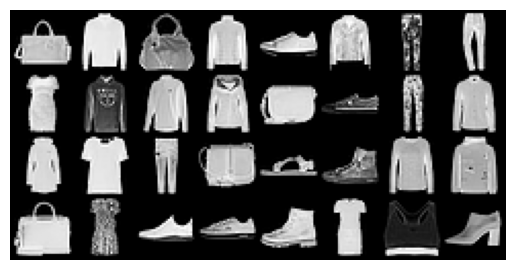

Ground Truth
Bag        Coat       Bag        Coat       Sneaker    Coat       Trouser    Trouser   
Dress      Pullover   Pullover   Coat       Bag        Sneaker    Trouser    Shirt     
Coat       Shirt      Trouser    Bag        Sandal     Sneaker    Pullover   Pullover  
Bag        Dress      Sneaker    Sneaker    Ankle boot Dress      Top        Ankle boot

Predicted
Bag        Coat       Bag        Coat       Sneaker    Coat       Trouser    Trouser   
Dress      Shirt      Coat       Coat       Bag        Sneaker    Trouser    Coat      
Coat       Top        Trouser    Bag        Sandal     Sneaker    Pullover   Coat      
Bag        Dress      Sneaker    Sneaker    Ankle boot Dress      Bag        Ankle boot


In [225]:
dataiter = iter(testloader)
images, labels = next(dataiter)

grid_show(images)
print("Ground Truth")
print_grid(labels)

outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print()
print("Predicted")
print_grid(predicted)

Obliczmy dokładności (accuracy) dla zbioru danych.

In [ ]:
def get_total_acc(model, testloader):
    correct = 0

    total = 0

    model.eval()

    with torch.no_grad():

        for data in testloader:

            images, labels = data

            outputs = model(images.to(device))

            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)

            correct += (predicted == labels.to(device)).sum().item()


    return 100 * correct // total

In [287]:
acc = get_total_acc(net, testloader)

print(f"Accuracy of the network on the 10000 test images: {acc} %")

Accuracy of the network on the 10000 test images: 81 %


Skomentuj wyniki:

Jest to okej dokładność. Zbiór danych nie jest taki oczywisty jak w przypadku MNISTa - niektóre klasy różnią niuanse, które ciężko wychwycić. Sam szukałbym jakiegoś ulepszenia modelu, ale jest to akceptowalne.

Znając ogólny wynik klasyfikacji dla zbioru przeanalizujmy dokładniej, z którymi klasami jest największy problem.

**Zadanie 3 (1 punkt)**

Oblicz dokładność działania sieci (accuracy) dla każdej klasy z osobna. Podczas oceniania skuteczności modelu nie potrzebujemy, aby gradienty się liczyły. Możemy zatem zawrzeć obliczenia w bloku `with torch.no_grad():`

In [ ]:
def plot_class_bar(
    classes: np.ndarray,
    values: np.ndarray,
    title: str,
    x_label: str,
    y_label: str,
    show_acc=False,
    rot: int = 90,
    show_names=True,
    figsize=(10, 6),
) -> None:

    plt.figure(figsize=figsize)

    plt.bar(classes, values, alpha=0.7)

    if show_acc:
        for i, value in enumerate(values):
            plt.text(
                classes[i],
                value + 1,
                f"{value:.2f}%",
                ha="center",
                va="bottom",
                fontsize=10,
            )

    if show_names:
        labels = classes
    else:
        labels = np.arange(len(classes)) + 1

    plt.xticks(rotation=rot, labels=labels, ticks=np.arange(len(classes)))

    plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.05)
    padding = len(classes) * 0.01
    plt.tight_layout(pad=padding * 10)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def plot_confusion_matrix(
    true: np.ndarray,
    predicted: np.ndarray,
    classes: int,
    show_labels: bool = True,
    colors=sns.cubehelix_palette(as_cmap=True),
    figsize=(10, 6),
) -> None:

    cm = confusion_matrix(true, predicted, labels=np.arange(len(classes)))

    plt.figure(figsize=figsize)

    if show_labels:
        xticklabels = yticklabels = classes

    else:
        xticklabels = yticklabels = np.arange(len(classes))

    sns.heatmap(
        cm,
        annot=show_labels,
        fmt="d",
        cmap=colors,
        xticklabels=xticklabels,
        yticklabels=yticklabels,
    )

    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")

    plt.show()

In [ ]:
# your_code
def get_all_acc(model, testloader, num_classes):
    correct = np.zeros((num_classes))
    total = np.zeros((num_classes))

    all_labels = []
    all_predictions = []

    model.eval()
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

            for p, l in zip(predicted, labels):
                correct[l] += l == p
                total[l] += 1

    return correct, total, all_predictions, all_labels

In [231]:
correct, total, all_predictions, all_labels = get_all_acc(net, testloader, 10)

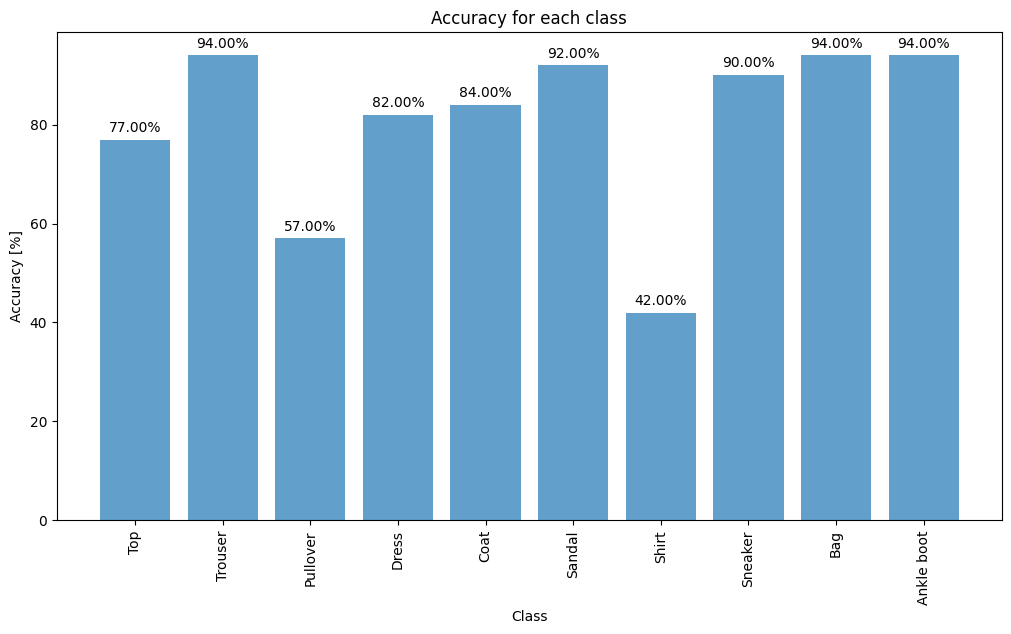

In [ ]:
values = 100 * correct // total

plot_class_bar(
    classes, values, "Accuracy for each class", "Class", "Accuracy [%]", show_acc=True
)

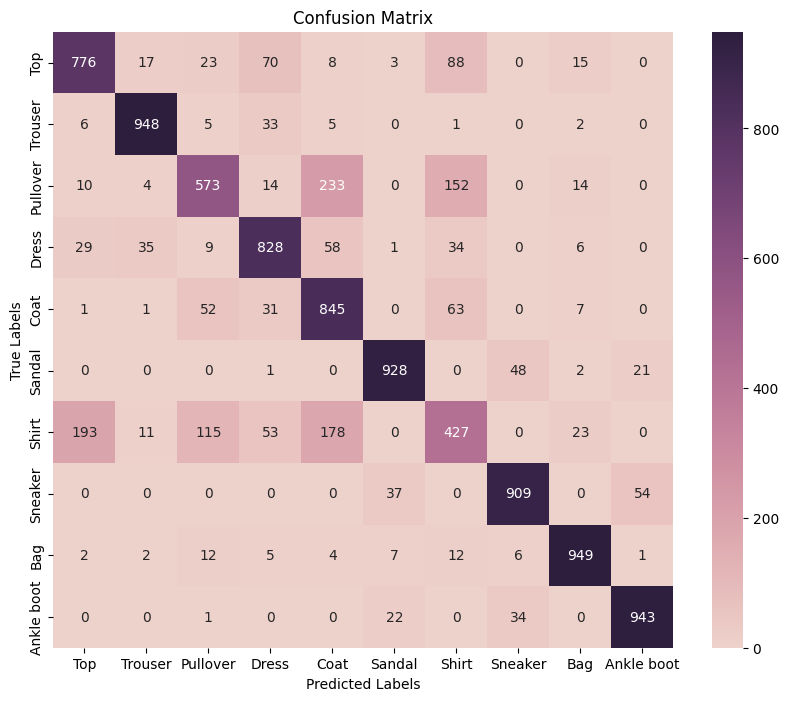

In [ ]:
plot_confusion_matrix(all_labels, all_predictions, classes, figsize=(10, 8))

Skomentuj wyniki:

Wyniki różniły się w zależności od wykonania kodu (wytrenowania modelu). Ich wspólną cechą było to, że najgorsze dokładności osiągały ubrania z klas: `Top`, `Shirt`, `Pullover`, `Coat`, często były to wartości 30-60%. Patrząc po danych jest to zrozumiałe, bo te ubrania są do siebie bardzo podobne i różnią je niuanse. To, że te klasy były między sobą mylone wiemy z macierzy pomyłek.

## Detekcja obiektów

Problem detekcji polega na nie tylko sklasyfikowaniu obiektów na obrazie, ale również wyznaczeniu jego dokładnego położenia w postaci bounding-box-u.
Choć jest to problem odmienny od klasyfikacji obrazów, to w praktyce ściśle z nim powiązany - modele do detekcji obiektów przeważnie do pewnego momentu wyglądają tak samo, jak modele klasyfikacji. Jednak pod koniec sieć jest dzielona na 2 wyjścia: jedno to standardowa klasyfikacja, a drugie to regresor określający pozycję obiektu na obrazie, tzw. bounding box. Najpopularniejszymi przykładami takich sieci są YOLO i Mask R-CNN. Zbiór danych też jest odpowiednio przygotowany do tego zadania i oprócz właściwych zdjęć zawiera również listę bounding-box-ów i ich etykiety.

Zobaczymy jak działa detekcja na przykładzie już wytrenowanej sieci neuronowej. Autorzy skutecznych sieci często udostępniają ich wagi online, dzięki czemu jeżeli mamy doczynienia z analogicznym problemem jak ten, do którego dana sieć była przygotowana możemy z niej skorzystać "prosto z pudełka". 

PyTorch pozwala nam na pobranie wytrenowanych wag dla kilku najpopularniejszych modeli. Sprawdzimy jak z tego skorzystać.

In [15]:
import urllib

import cv2
import numpy as np
from PIL import Image
from torchvision.models import detection

Poniżej znajduje się funkcja pozwalająca wczytać obraz z sieci. Przyda się do testowania działania sieci.

In [16]:
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

Model, którym się zajmiemy to Faster R-CNN, który był trenowany na zbiorze COCO. Poniżej znajduje się lista klas (etykiet) dla tego zbioru danych.

In [17]:
classes = [
    "__background__",
    "person",
    "bicycle",
    "car",
    "motorcycle",
    "airplane",
    "bus",
    "train",
    "truck",
    "boat",
    "traffic light",
    "fire hydrant",
    "street sign",
    "stop sign",
    "parking meter",
    "bench",
    "bird",
    "cat",
    "dog",
    "horse",
    "sheep",
    "cow",
    "elephant",
    "bear",
    "zebra",
    "giraffe",
    "hat",
    "backpack",
    "umbrella",
    "handbag",
    "tie",
    "shoe",
    "eye glasses",
    "suitcase",
    "frisbee",
    "skis",
    "snowboard",
    "sports ball",
    "kite",
    "baseball bat",
    "baseball glove",
    "skateboard",
    "surfboard",
    "tennis racket",
    "bottle",
    "plate",
    "wine glass",
    "cup",
    "fork",
    "knife",
    "spoon",
    "bowl",
    "banana",
    "apple",
    "sandwich",
    "orange",
    "broccoli",
    "carrot",
    "hot dog",
    "pizza",
    "donut",
    "cake",
    "chair",
    "couch",
    "potted plant",
    "bed",
    "mirror",
    "dining table",
    "window",
    "desk",
    "toilet",
    "door",
    "tv",
    "laptop",
    "mouse",
    "remote",
    "keyboard",
    "cell phone",
    "microwave",
    "oven",
    "toaster",
    "sink",
    "refrigerator",
    "blender",
    "book",
    "clock",
    "vase",
    "scissors",
    "teddy bear",
    "hair drier",
    "toothbrush",
]

colors = np.random.randint(0, 256, size=(len(classes), 3))

Inizjalizacja modelu ResNet50-FPN wytrenowanymi wagami. Inicjalizujemy zarówno sieć backbone jak i RCNN.

In [18]:
model = detection.fasterrcnn_resnet50_fpn(
    weights=detection.FasterRCNN_ResNet50_FPN_Weights.DEFAULT,
    weights_backbone=torchvision.models.ResNet50_Weights.DEFAULT,
    progress=True,
    num_classes=len(classes),
).to(device)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

IPython, z którego korzystamy w Jupyter Notebooku, ma wbudowaną funkcję `display()` do wyświetlania obrazów. 

Do pobierania obrazów możemy się posłyżyć wget-em.

In [19]:
# Pobieranie obrazka z sieci
# !wget https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Toothbrush_x3_20050716_001.jpg/1280px-Toothbrush_x3_20050716_001.jpg --output-document toothbrushes.jpg

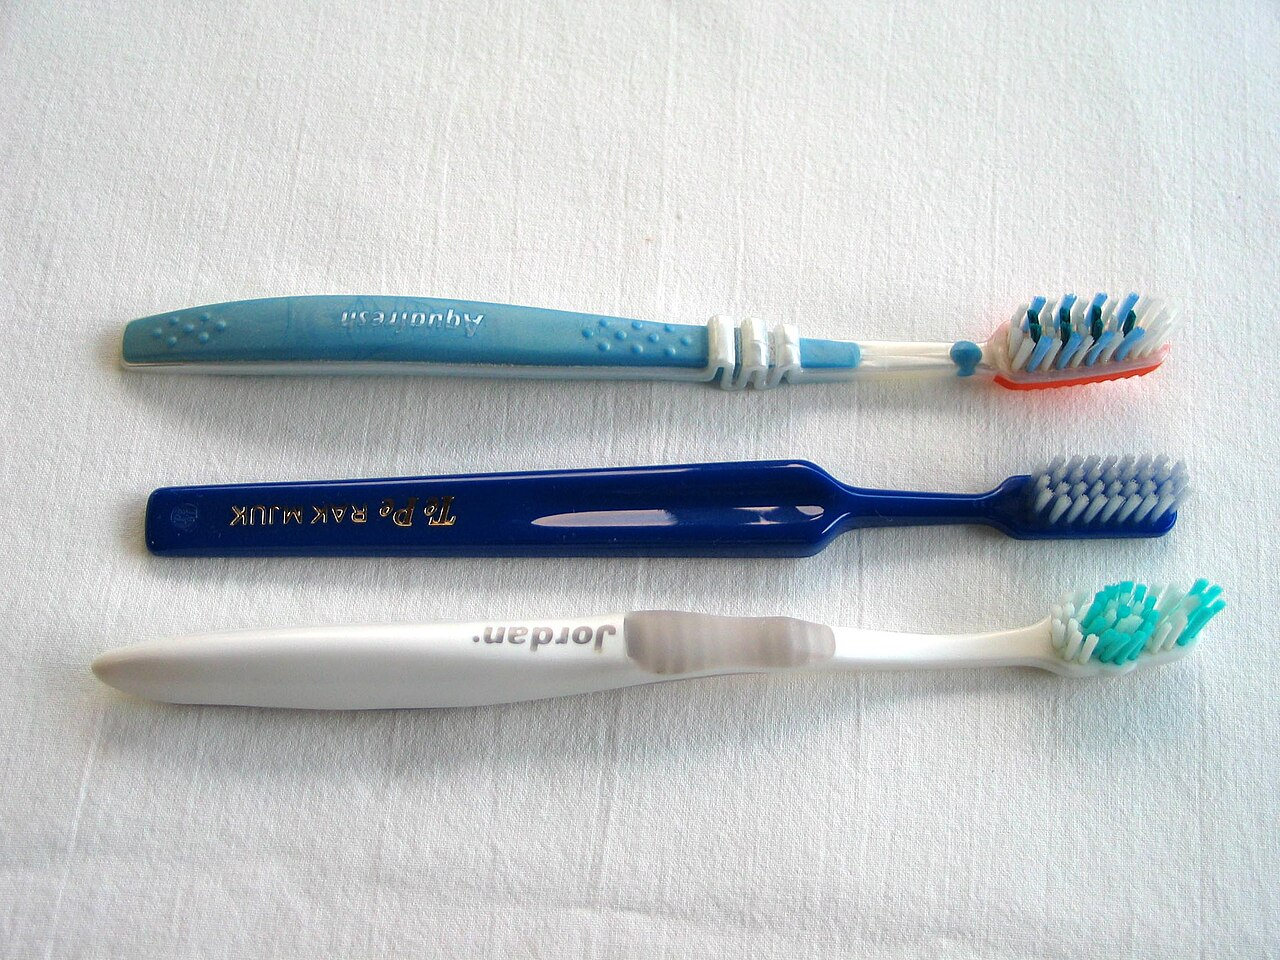

In [20]:
# Wyświetlanie obrazka
image = Image.open("toothbrushes.jpg")
# make sure we have 3-channel RGB, e.g. without transparency
image = image.convert("RGB")
display(image)

PyTorch wymaga obrazów w kształcie [channels, height, width] (C, H, W) oraz z wartościami pikseli między 0 a 1. Pillow wczytuje obrazy z kanałami (H, W, C) oraz z wartościami pikseli między 0 a 255. Przed wykorzystaniem sieci neuronowej trzeba zatem:
- zamienić obraz na tensor
- zmienić kolejność kanałów
- podzielić wartości pikseli przez 255

In [21]:
image_tensor = torch.from_numpy(np.array(image))
image_tensor = image_tensor.permute(2, 0, 1)
image_tensor_int = image_tensor  # useful for displaying, dtype = uint8
image_tensor = image_tensor / 255
image_tensor.shape, image_tensor.dtype

image_tensor = image_tensor.unsqueeze(0)

**Zadanie 4 (1 punkt)**

Użyj modelu do wykrycia obiektów na obrazie. Następnie wybierz tylko te bounding boxy, dla których mamy wynik powyżej 50%. Wypisz te bounding boxy, ich prawdopodobieństwa (w procentach) oraz nazwy klas.

Następnie wykorzystaj wyniki do zaznaczenia bounding box'a dla każdego wykrytego obiektu na obrazie oraz podpisz wykrytą klasę wraz z prawdopodobieństwem. Możesz tutaj użyć:
- [OpenCV](https://stackoverflow.com/questions/56108183/python-opencv-cv2-drawing-rectangle-with-text)
- [PyTorch - Torchvision](https://pytorch.org/vision/stable/auto_examples/others/plot_visualization_utils.html#visualizing-bounding-boxes)

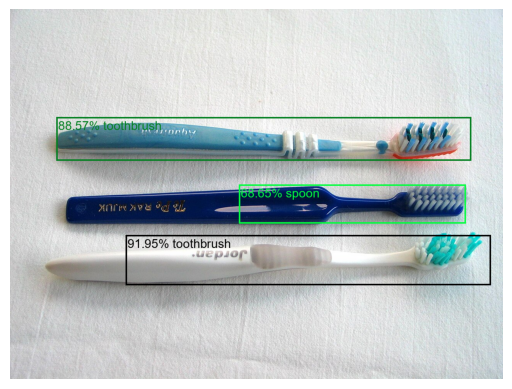

In [22]:
# your_code

from torchvision.utils import draw_bounding_boxes

outputs = model(image_tensor.to(device))

score_threshold = 0.5

image_with_boxes = [
    draw_bounding_boxes(
        image_tensor_int,
        boxes=output["boxes"][output["scores"] > score_threshold],
        labels=[
            f"{(score.item()*100):.2f}% {classes[label.item()]} "
            for label, score in zip(
                output["labels"][output["scores"] > score_threshold],
                output["scores"][output["scores"] > score_threshold],
            )
        ],
        width=4,
        font_size=32,
        font="arial",
    )
    for output in outputs
]

for i in image_with_boxes:
    plt.imshow(i.permute(1, 2, 0))
    plt.axis("off")
    plt.show()

## Fine-tuning i pretrening

Trenowanie głębokich sieci neuronowych do przetwarzania obrazów jest zadaniem wymagającym bardzo dużych zbiorów danych i zasobów obliczeniowych. Często jednak, nie musimy trenować takich sieci od nowa, możemy wykorzystać wytrenowane modele i jedynie dostosowywaać je do naszych problemów. Działanie takie nazywa się transfer learning-iem. 

Przykładowao: mamy już wytrenowaną sieć na dużym zbiorze danych (pretrening) i chcemy, żeby sieć poradziła sobie z nową klasą obiektów (klasyfikacja), albo lepiej radziła sobie z wybranymi obiektami, które już zna (fine-tuning). Możemy usunąć ostatnią warstwę sieci i na jej miejsce wstawić nową, identyczną, jednak z losowo zainicjalizowanymi wagami, a następnie dotrenować sieć na naszym nowym, bardziej specyficznym zbiorze danych. Przykładowo, jako bazę weźmiemy model wytrenowany na zbiorze ImageNet i będziemy chcieli użyć go do rozpoznawania nowych, nieznanych mu klas, np. ras psów.

Dla przećwiczenia takiego schematu działania wykorzystamy zbiór danych z hotdogami. Będziemy chcieli stwierdzić, czy na obrazku jest hotdog, czy nie. Jako sieci użyjemy modelu ResNet-18, pretrenowanej na zbiorze ImageNet.

In [23]:
# # Download the hotdog dataset
# !wget http://d2l-data.s3-accelerate.amazonaws.com/hotdog.zip
# !unzip -n hotdog.zip

Kiedy korzystamy z sieci pretrenowanej na zbiorze ImageNet, zgodnie [z dokumentacją](https://pytorch.org/vision/0.8/models.html) trzeba dokonać standaryzacji naszych obrazów, odejmując średnią i dzieląc przez odchylenie standardowe każdego kanału ze zbioru ImageNet.

```
All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are
expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]. You can use the following transform to normalize:

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])

```

In [24]:
torch.manual_seed(17)

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

train_augs = torchvision.transforms.Compose(
    [
        torchvision.transforms.RandomResizedCrop(224),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
        normalize,
    ]
)

test_augs = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize(256),
        torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        normalize,
    ]
)

Jeżeli nie stosowalibyśmy żadnych dodatkowych transformacji (flipy, zoomy, rotate'y, zmiany w kolorach), to można też użyc [gotowej kompozycji transformacji](https://pytorch.org/vision/main/models/generated/torchvision.models.resnet18.html) (Pythorch chyba ma dla każdej implementacji taką)

In [212]:
torchvision.models.ResNet18_Weights.IMAGENET1K_V1.transforms

functools.partial(<class 'torchvision.transforms._presets.ImageClassification'>, crop_size=224)

In [25]:
pretrained_net = torchvision.models.resnet18(
    weights=torchvision.models.ResNet18_Weights.IMAGENET1K_V1
)

In [26]:
pretrained_net.fc

Linear(in_features=512, out_features=1000, bias=True)

**Zadanie 5 (1 punkt)**

Dodaj warstwę liniową do naszej fine-fune'owanej sieci oraz zainicjuj ją losowymi wartościami.

In [206]:
from copy import deepcopy

finetuned_net = deepcopy(pretrained_net)

finetuned_net.fc = nn.Linear(in_features=512, out_features=2)

for param in finetuned_net.fc.parameters():
    nn.init.uniform_(param)

Z dokumentacji wyczytałem, że warstwy liniowe i tak [mają już](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) zainicjowane losowe wartości (wagi i biasy).

In [ ]:
import copy
import time


def train_model(
    model,
    dataloaders,
    criterion,
    optimizer,
    num_epochs=25,
    print_interval=1,
    patience=None,
):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    if patience is None:
        patience = num_epochs

    current_patience = patience

    for epoch in range(1, num_epochs + 1):

        if epoch % print_interval == 0:
            print("Epoch {}/{}".format(epoch, num_epochs))
            print("-" * 10)

        # Each epoch has a training and validation phase
        for phase in ["train", "val"]:
            if phase == "train":
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == "train"):
                    # Get model outputs and calculate loss

                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.float() / len(dataloaders[phase].dataset)
            if epoch % print_interval == 0:
                print(
                    "{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc)
                )

            # deep copy the model
            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                current_patience = patience
            else:
                current_patience -= 1

            if phase == "val":
                val_acc_history.append(epoch_acc)

        if current_patience <= 0:
            print(f"Patience exceeded, stopped early for epoch {epoch}")
            break

        if epoch % print_interval == 0:
            print()

    time_elapsed = time.time() - since
    print(
        "Training complete in {:.0f}m {:.0f}s".format(
            time_elapsed // 60, time_elapsed % 60
        )
    )
    print("Best val Acc: {:4f}".format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [29]:
import os

data_dir = "data\\hotdog"
batch_size = 32

model_ft = finetuned_net.to(device)
train_iter = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, "train"), transform=train_augs
    ),
    batch_size=batch_size,
    shuffle=True,
)
test_iter = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, "test"), transform=test_augs
    ),
    shuffle=True,
    batch_size=batch_size,
)
loss = nn.CrossEntropyLoss(reduction="none")

**Zadanie 6 (1 punkt)**

Zmodyfikuj tak parametry sieci, aby learning rate dla ostatniej warstwy był 10 razy wyższy niż dla pozostałych.

Trzeba odpowiednio podać pierwszy parametr `torch.optim.SGD` tak, aby zawierał parametry normalne, oraz te z `lr * 10`. Paramety warstw niższych to takie, które mają nazwę inną niż `fc.weight` albo `fc.bias` - może się przydać metoda sieci `named_parameters()`.


In [30]:
def train_fine_tuning(net, learning_rate, num_epochs=15):

    normal_params = []
    last_layer_params = []

    for name, param in net.named_parameters():
        if "fc" in name:
            last_layer_params.append(param)
        else:
            normal_params.append(param)

    trainer = torch.optim.SGD(
        [
            {"params": normal_params, "lr": learning_rate},
            {"params": last_layer_params, "lr": learning_rate * 10},
        ]
    )

    dataloaders_dict = {"train": train_iter, "val": test_iter}
    criterion = nn.CrossEntropyLoss()
    model_ft, hist = train_model(
        net, dataloaders_dict, criterion, trainer, num_epochs=num_epochs
    )
    return model_ft, hist


# your_code

In [31]:
model_ft, hist = train_fine_tuning(model_ft, learning_rate=5e-5)

Epoch 1/15
----------
train Loss: 2.2512 Acc: 0.6015
val Loss: 1.4956 Acc: 0.6987

Epoch 2/15
----------
train Loss: 1.4175 Acc: 0.6950
val Loss: 1.0598 Acc: 0.7562

Epoch 3/15
----------
train Loss: 1.0558 Acc: 0.7490
val Loss: 0.9215 Acc: 0.8000

Epoch 4/15
----------
train Loss: 0.9555 Acc: 0.7845
val Loss: 0.7834 Acc: 0.8137

Epoch 5/15
----------
train Loss: 0.7981 Acc: 0.7910
val Loss: 0.7077 Acc: 0.8325

Epoch 6/15
----------
train Loss: 0.7891 Acc: 0.8085
val Loss: 0.6793 Acc: 0.8500

Epoch 7/15
----------
train Loss: 0.7480 Acc: 0.8205
val Loss: 0.6734 Acc: 0.8500

Epoch 8/15
----------
train Loss: 0.7127 Acc: 0.8215
val Loss: 0.5915 Acc: 0.8662

Epoch 9/15
----------
train Loss: 0.6266 Acc: 0.8440
val Loss: 0.5963 Acc: 0.8725

Epoch 10/15
----------
train Loss: 0.6160 Acc: 0.8420
val Loss: 0.5705 Acc: 0.8762

Epoch 11/15
----------
train Loss: 0.6148 Acc: 0.8465
val Loss: 0.5698 Acc: 0.8837

Epoch 12/15
----------
train Loss: 0.6568 Acc: 0.8410
val Loss: 0.5972 Acc: 0.8775

E

skomentuj wyniki:

Dzięki transfer-learningowi uzyskaliśmy naprawdę dobrą dokładność w małym czasie, co jest dużą zaletą tego podejścia - nie musimy trenować sieci od 0.

Przy wyświetlaniu predykcji sieci musimy wykonać operacje odwrotne niż te, które wykonaliśmy, przygotowując obrazy do treningu:
- zamienić kolejność kanałów z (C, H, W) na (H, W, C)
- zamienić obraz z tensora na tablicę Numpy'a
- odwrócić normalizację (mnożymy przez odchylenie standardowe, dodajemy średnią) i upewnić się, że nie wychodzimy poza zakres [0, 1] (wystarczy proste przycięcie wartości)

In [281]:
def imshow(img, title=None):

    img = img.permute(1, 2, 0).numpy()

    means = np.array([0.485, 0.456, 0.406])

    stds = np.array([0.229, 0.224, 0.225])

    img = stds * img + means

    img = np.clip(img, 0, 1)

    plt.imshow(img)

    if title is not None:
        plt.title(title)

    plt.pause(0.001)

In [33]:
import matplotlib.pyplot as plt

plt.ion()


def visualize_model(model, class_names, num_images=6):
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_iter):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images // 2, 2, images_so_far)
                ax.axis("off")
                ax.set_title(f"predicted: {class_names[preds[j]]}")
                ax.text(
                    0.5,
                    -0.2,
                    f"ground truth: {class_names[labels[j]]}",
                    ha="center",
                    va="center",
                    transform=ax.transAxes,
                )
                imshow(inputs.data[j].cpu())

                if images_so_far == num_images:
                    return

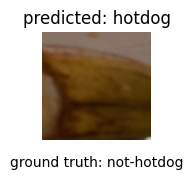

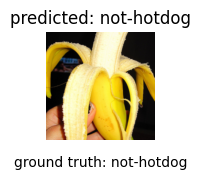

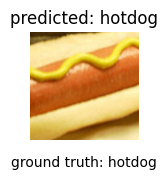

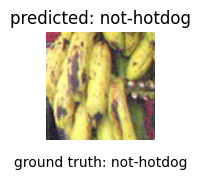

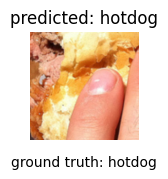

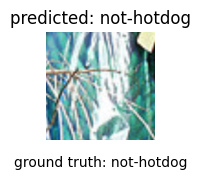

In [34]:
visualize_model(model_ft, ["hotdog", "not-hotdog"])

## Zadanie dla chętnych (3 punkty)

W zadaniach dotyczących klasyfikacji obrazu wykorzystywaliśmy prosty zbiór danych i sieć LeNet. Teraz zamień zbiór danych na bardziej skomplikowany, np. [ten](http://www.vision.caltech.edu/datasets/cub_200_2011/) lub [ten](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia) (lub inny o podobnym poziomie trudności) i zamiast prostej sieci LeNet użyj bardziej złożonej, np. AlexNet, ResNet, MobileNetV2.


In [252]:
pretrained_alex = torchvision.models.alexnet(
    weights=torchvision.models.AlexNet_Weights.IMAGENET1K_V1
)

In [253]:
from torch.utils.data import Dataset
import pandas as pd


class Cub2011(Dataset):
    base_folder = "CUB_200_2011/images"

    def __init__(self, root, isTrain=True, transform=None):
        self.root = root
        self.transform = transform
        self.isTrain = isTrain

        self._load_metadata()

    def _load_metadata(self):
        images = pd.read_csv(
            os.path.join(self.root, "CUB_200_2011", "images.txt"),
            sep=" ",
            names=["img_id", "filepath"],
        )
        image_class_labels = pd.read_csv(
            os.path.join(self.root, "CUB_200_2011", "image_class_labels.txt"),
            sep=" ",
            names=["img_id", "target"],
        )
        train_test_split = pd.read_csv(
            os.path.join(self.root, "CUB_200_2011", "train_test_split.txt"),
            sep=" ",
            names=["img_id", "is_training_img"],
        )

        data = images.merge(image_class_labels, on="img_id")
        self.data = data.merge(train_test_split, on="img_id")

        if self.isTrain:
            self.data = self.data[self.data.is_training_img == 1]
        else:
            self.data = self.data[self.data.is_training_img == 0]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data.iloc[idx]
        path = os.path.join(self.root, self.base_folder, sample.filepath)
        target = sample.target - 1
        img = Image.open(path).convert("RGB")
        img = self.transform(img)

        return img, target

In [254]:
root = os.path.join(os.getcwd(), "data")

classes = pd.read_csv(
    os.path.join(root, "CUB_200_2011", "classes.txt"),
    sep=" ",
    names=["class_id", "name"],
)

classes["name"] = classes["name"].str[4:]
classes["name"] = classes["name"].str.replace("_", " ")

class_names = list(classes["name"])

print(f"Class count: {len(classes)}\n")

print(f"Sample class names: ")
print(classes.head())

Class count: 200

Sample class names: 
   class_id                    name
0         1  Black footed Albatross
1         2        Laysan Albatross
2         3         Sooty Albatross
3         4       Groove billed Ani
4         5          Crested Auklet


In [ ]:
# transformer = torchvision.models.AlexNet_Weights.IMAGENET1K_V1.transforms()

from torchvision.transforms import v2

torch.manual_seed(17)

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])


train_augs = torchvision.transforms.Compose(
    [
        v2.Resize(256),
        v2.RandomResizedCrop(224),
        v2.RandomApply(
            [
                v2.RandomRotation((-30, 30)),
                v2.RandomHorizontalFlip(),
            ]
        ),
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        normalize,
    ]
)

test_augs = torchvision.transforms.Compose(
    [
        v2.Resize(256),
        v2.CenterCrop(224),
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        normalize,
    ]
)

In [ ]:
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

train_dataset = Cub2011(root=root, isTrain=True, transform=train_augs)
test_dataset = Cub2011(root=root, isTrain=False, transform=test_augs)

test_dataset, valid_dataset = train_test_split(
    test_dataset, test_size=0.5, shuffle=True
)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Valid dataset size: {len(valid_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

batch_size = 48
train_iter = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_iter = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
test_iter = DataLoader(test_dataset, batch_size=len(test_iter), shuffle=True)

images, labels = next(iter(train_iter))
print(f"Sample batch size: {images.size()}")

Train dataset size: 5994
Valid dataset size: 2897
Test dataset size: 2897
Sample batch size: torch.Size([48, 3, 224, 224])


In [277]:
def plot_sample(images, labels, classes, nrow=8):

    imshow(
        torchvision.utils.make_grid(images, nrow=nrow, scale_each=True, pad_value=10)
    )

    rows = [labels[n : n + nrow] for n in range(0, len(labels), nrow)]
    for r in rows:
        print(
            " ".join(
                f"{classes[c]:{len(max(classes, key=lambda x: len(x)))}s}" for c in r
            )
        )

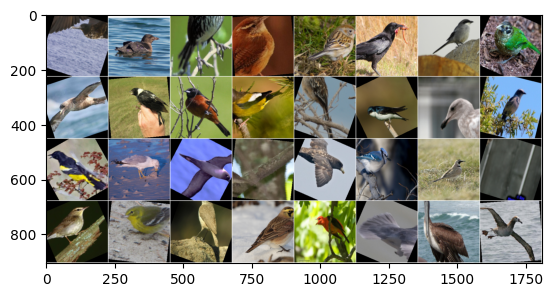

Frigatebird                    Rhinoceros Auklet              Seaside Sparrow                Carolina Wren                  Field Sparrow                  American Crow                  Great Grey Shrike              Spotted Catbird               
Northern Fulmar                Bobolink                       Orchard Oriole                 Evening Grosbeak               Geococcyx                      Tree Swallow                   Glaucous winged Gull           Florida Jay                   
Scott Oriole                   Ring billed Gull               Sooty Albatross                Swainson Warbler               Northern Fulmar                Blue Jay                       Horned Lark                    Song Sparrow                  
Swainson Warbler               Yellow throated Vireo          Rock Wren                      Horned Lark                    Scarlet Tanager                Northern Fulmar                Brown Pelican                  Black footed Albatross        


In [282]:
images, labels = next(iter(train_iter))

plot_sample(images=images[:32], labels=labels[:32], classes=class_names)

In [ ]:
pretrained_alex.classifier

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [ ]:
finetuned_alex = deepcopy(pretrained_alex)

finetuned_alex.classifier = nn.Sequential(
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(in_features=9216, out_features=4096, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=4096, out_features=len(classes), bias=True),
)

model_ft = finetuned_alex.to(device)

In [ ]:
def train_alex_with_fine_tuning(
    net,
    learning_rate,
    train_iter,
    valid_iter,
    num_epochs=100,
    print_interval=1,
    patience=None,
):

    normal_params = []
    last_layer_params = []

    for name, param in net.named_parameters():
        if "fc" in name:
            last_layer_params.append(param)
        else:
            normal_params.append(param)

    trainer = torch.optim.AdamW(
        [
            {"params": normal_params, "lr": learning_rate},
            {"params": last_layer_params, "lr": learning_rate * 10},
        ]
    )

    dataloaders_dict = {"train": train_iter, "val": valid_iter}
    criterion = nn.CrossEntropyLoss()
    model_ft, hist = train_model(
        net,
        dataloaders_dict,
        criterion,
        trainer,
        num_epochs=num_epochs,
        print_interval=print_interval,
        patience=patience,
    )
    return model_ft, hist

In [ ]:
trained_model_ft, hist = train_alex_with_fine_tuning(
    model_ft,
    learning_rate=1e-4,
    train_iter=train_iter,
    valid_iter=valid_iter,
    num_epochs=60,
    patience=3,
)

Epoch 1/30
----------
train Loss: 5.3003 Acc: 0.0062
val Loss: 5.1864 Acc: 0.0110

Epoch 2/30
----------
train Loss: 4.9854 Acc: 0.0194
val Loss: 4.4224 Acc: 0.0597

Epoch 3/30
----------
train Loss: 4.2666 Acc: 0.0749
val Loss: 3.3884 Acc: 0.1857

Epoch 4/30
----------
train Loss: 3.5197 Acc: 0.1710
val Loss: 2.7836 Acc: 0.2751

Epoch 5/30
----------
train Loss: 3.1066 Acc: 0.2466
val Loss: 2.4282 Acc: 0.3438

Epoch 6/30
----------
train Loss: 2.8389 Acc: 0.2970
val Loss: 2.2619 Acc: 0.4063

Epoch 7/30
----------
train Loss: 2.6564 Acc: 0.3390
val Loss: 2.1279 Acc: 0.4405

Epoch 8/30
----------
train Loss: 2.5108 Acc: 0.3657
val Loss: 2.0109 Acc: 0.4532

Epoch 9/30
----------
train Loss: 2.3629 Acc: 0.4027
val Loss: 1.9604 Acc: 0.4712

Epoch 10/30
----------
train Loss: 2.2776 Acc: 0.4173
val Loss: 1.8570 Acc: 0.4995

Epoch 11/30
----------
train Loss: 2.1798 Acc: 0.4378
val Loss: 2.0112 Acc: 0.4891

Epoch 12/30
----------
train Loss: 2.1027 Acc: 0.4630
val Loss: 1.8570 Acc: 0.5254

E

In [ ]:
correct, total, all_predictions, all_labels = get_all_acc(
    trained_model_ft, test_iter, len(classes)
)

In [ ]:
acc = get_total_acc(trained_model_ft, test_iter)

print(f"Accuracy of the network for the test set: {acc} %")

Accuracy of the network for the test set: 57 %


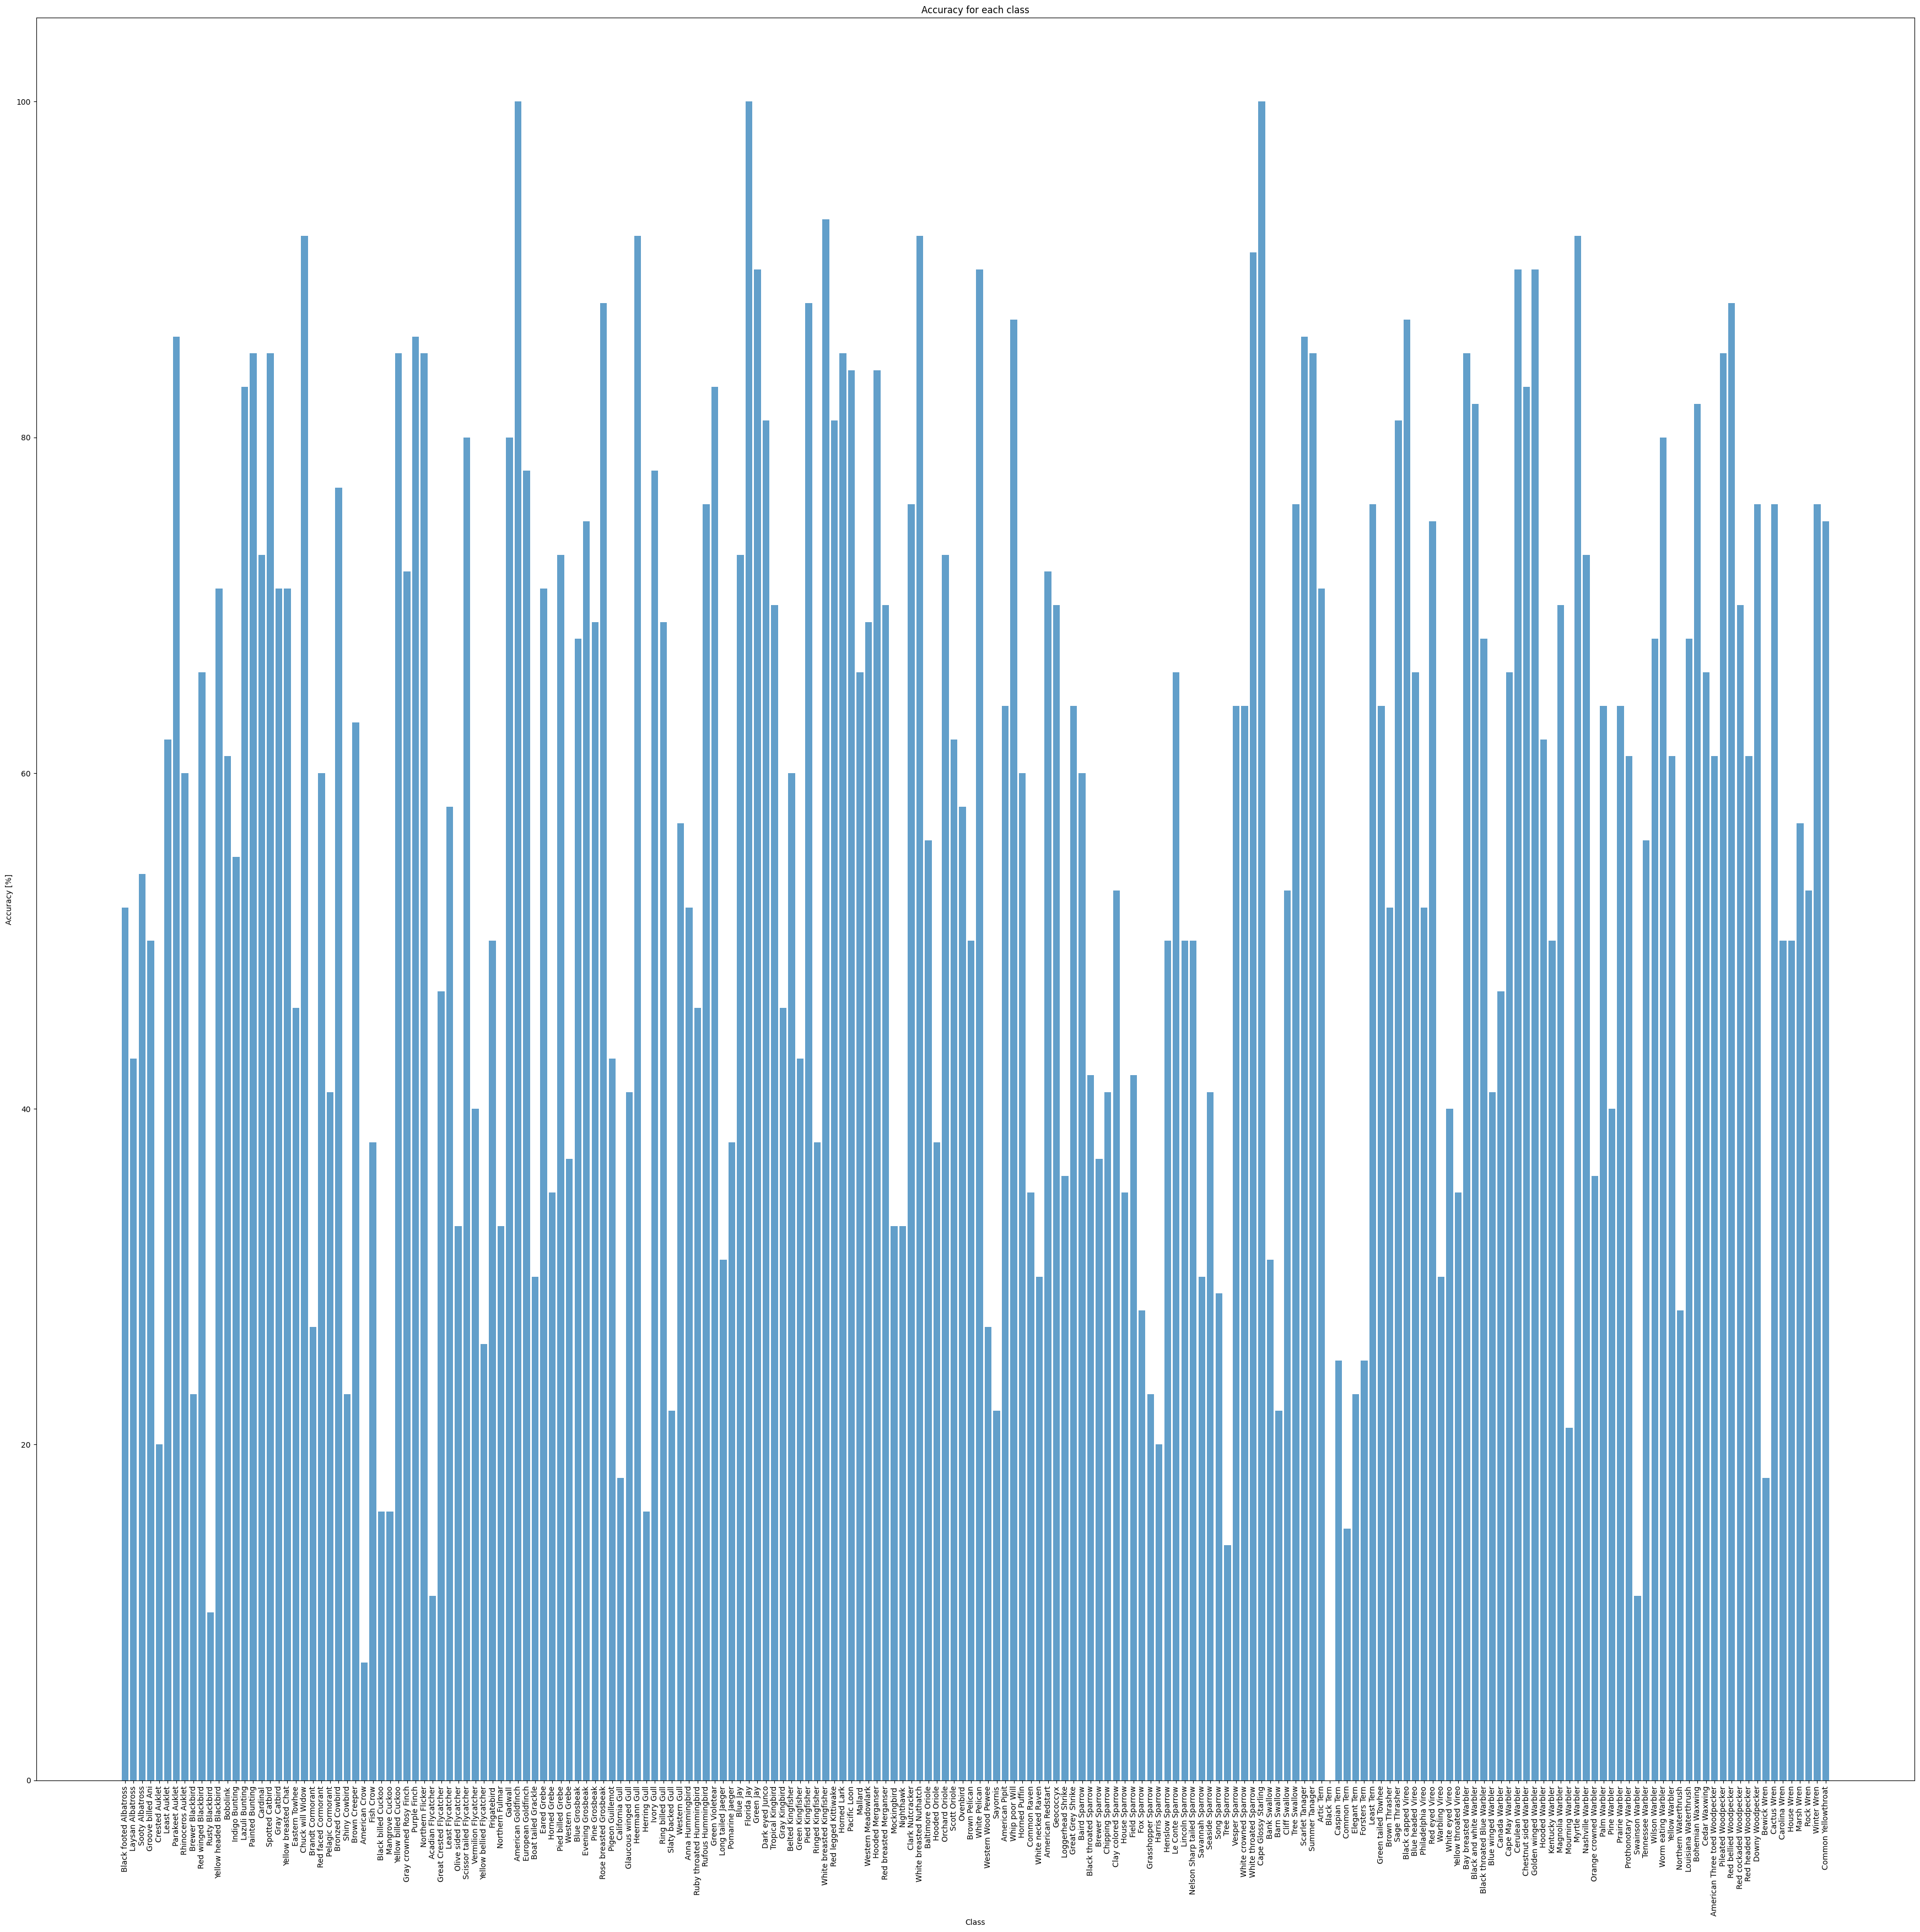

In [ ]:
values = 100 * correct // total

plot_class_bar(class_names, values, "Accuracy for each class", "Class", "Accuracy [%]")

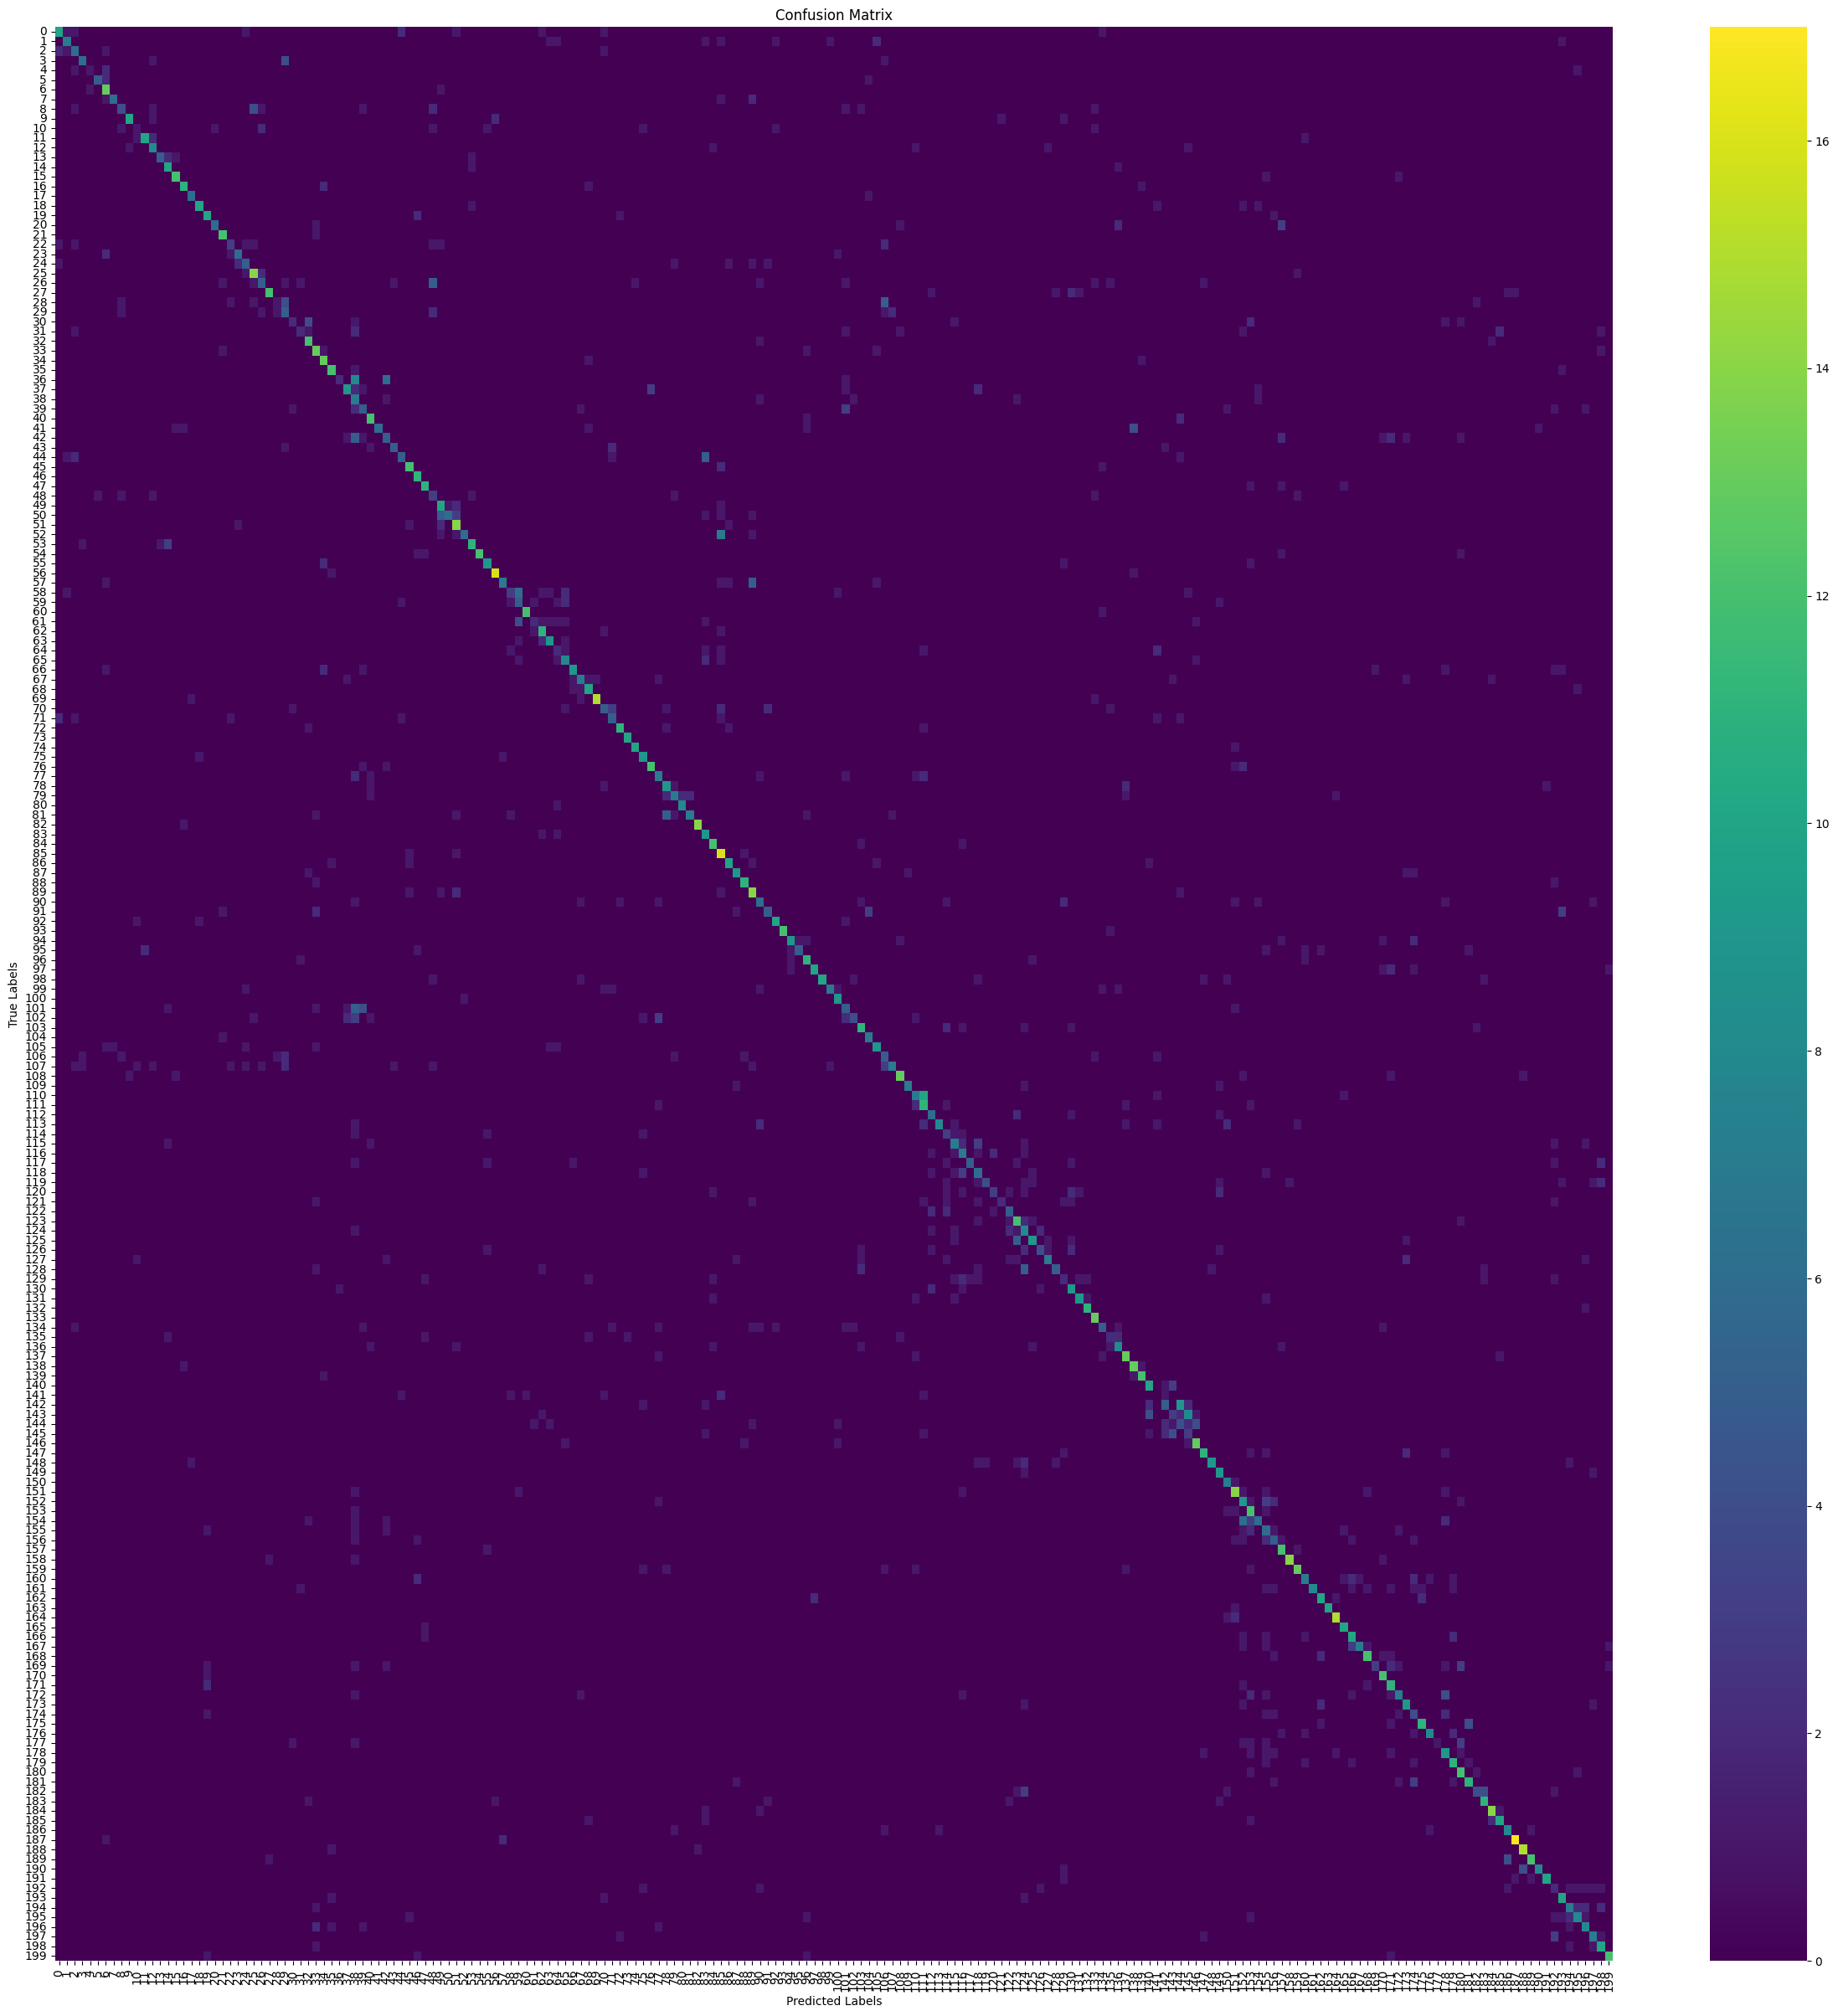

In [ ]:
plot_confusion_matrix(all_labels, all_predictions, classes, False, colors="viridis")

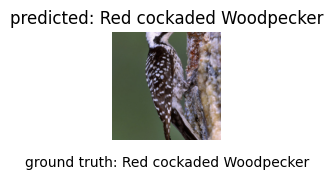

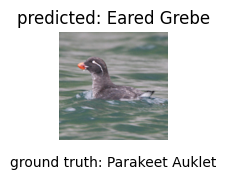

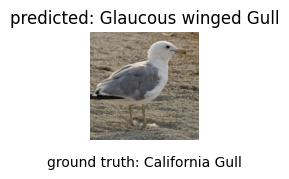

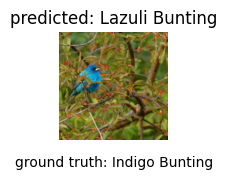

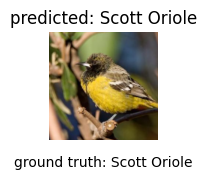

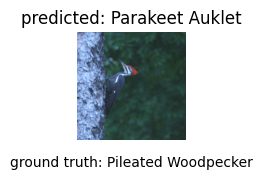

In [ ]:
visualize_model(trained_model_ft, class_names=class_names, num_images=6)

Przetestowałem dużo różnych kombinacji parametrów (liczba epok, patience, lr, głębokość i szerokość heada, rozmiar batcha, różne transformacje danych treningowych, funkcja aktywacji, dropout). Myślałem, że nie będzie to tak trudne wybrać parametry ręcznie, ale się myliłem - lepiej byłoby użyc np. `optuna` niż samemu to robić. Najlepsza dokładność modelu nie przekroczyła 60% co jest dosyć słabym wynikiem (patrząc ogólnie). Z tego co [czytałem](https://paperswithcode.com/sota/fine-grained-image-classification-on-cub-200) to raczej do takich ciężkich zadań nie korzysta się z 'czystego' AlexNeta, więc nie jestem pewny czy dałoby się wyciągnąć z niego dużo dużo więcej. Tutaj podobnie jak w FashionMNIST te same podgatunki ptaków (np. Harlow ...) były ze soba mylone - widać to na macierzy pomyłek jako rozmyte części przekątnej (dane są poszeregowane gatunkami, więc cały podgatunek jest wylistowany po kolei). Myślę, że w celu ulepszenia trzeba zmienić backbone, a do selekcji hiperparametrów użyć np. `optuna` (jeżeli się ma czas). Dużo dała odpowiednia transformacja danych - w moim wypadku poprawiła wyniki o kilka procent.